In [1]:
import pandas as pd
import evaluation_helper as eval

# Read in data

features = pd.read_csv('./data/answer.csv', sep=';')
#features = pd.read_csv('../data/answer.csv', sep=';')

features.describe()

/home/dave/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,user,place_asked,place_answered,type,response_time,place_map,language,ip_id
count,1.008730e+07,1.008730e+07,1.008730e+07,9.805599e+06,1.008730e+07,1.008730e+07,9.590318e+06,1.008730e+07,9.313760e+06
mean,5.057236e+06,5.992753e+04,4.918974e+02,4.880717e+02,1.158527e+00,1.388761e+07,1.872767e+02,5.638374e-02,1.778498e+04
std,2.913090e+06,3.574237e+04,4.610208e+02,4.598886e+02,3.652348e-01,1.734263e+08,6.405243e+01,2.565005e-01,1.284761e+04
min,2.407000e+03,7.500000e+01,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,5.800000e+01,0.000000e+00,2.000000e+00
25%,2.535713e+06,2.827000e+04,1.280000e+02,1.260000e+02,1.000000e+00,2.559000e+03,1.150000e+02,0.000000e+00,6.769000e+03
50%,5.057811e+06,6.134200e+04,2.170000e+02,2.160000e+02,1.000000e+00,3.733000e+03,2.270000e+02,0.000000e+00,1.567400e+04
75%,7.579838e+06,8.926200e+04,9.830000e+02,9.780000e+02,1.000000e+00,6.161000e+03,2.300000e+02,0.000000e+00,2.776700e+04
max,1.010184e+07,1.242560e+05,1.473000e+03,1.473000e+03,2.000000e+00,4.294967e+09,2.320000e+02,2.000000e+00,4.528100e+04


In [2]:
# Parsing labels
import numpy as np
questions = np.array(features['place_asked'])


In [3]:
len(np.unique(questions))

1458

In [4]:
questions = np.array(features['place_asked'])
answers = np.array(features['place_answered'])
labels = np.equal(questions, answers)
labels = list(map(lambda x: 1 if x else 0, labels))
labels = np.array(labels)


In [5]:
features['correct'] = labels
features.sample(10)

,id,user,place_asked,place_answered,type,inserted,response_time,place_map,language,options,ip_country,ip_id,correct
9493500,9507976,116635,1222,1222.0,1,2015-05-04 20:11:08,5735,228.0,0,[],CZ,22148.0,1
7319998,7334358,87250,1262,1262.0,1,2015-03-01 16:52:31,2456,79.0,0,[],CZ,32896.0,1
2645077,2658994,29447,51,NaN,1,2014-10-06 20:04:58,4314,230.0,0,[],CZ,10435.0,0
8206752,8221113,98736,1244,1239.0,1,2015-03-26 16:42:11,5559,79.0,0,"[1234, 1244, 1239]",CZ,37052.0,0
240394,246775,2302,63,63.0,1,2014-02-05 12:39:47,1998,NaN,0,[],NaN,NaN,1
5195268,5209427,63401,122,122.0,1,2015-01-04 17:26:53,3480,227.0,0,[],CZ,10824.0,1
5156037,5170196,62993,362,362.0,1,2015-01-03 18:29:50,3278,230.0,0,[],CZ,12118.0,1
420155,428039,3965,199,199.0,1,2014-03-02 19:34:44,2565,NaN,0,[],NaN,NaN,1
5657732,5671901,62599,478,478.0,1,2015-01-13 22:24:54,5510,230.0,0,[],CZ,23562.0,1
6553403,6567753,78101,1236,1236.0,1,2015-02-06 12:08:31,2175,79.0,0,[],CZ,29536.0,1


In [6]:
codes = pd.read_csv('./data/place_code.csv', sep=';')
codes = codes[['id','name']]
codes = codes.rename(index=str, columns={"id":"place_asked", "name":"name"})
codes.sample(5)

,place_asked,name
1181,1189,Dubai
287,295,Uttaranchal
766,774,Nice
127,133,Cuba
833,841,Trinidad and Tobago


In [7]:
ids = [i for i in range(51,224)]
filtered = features[features['place_asked'].isin(ids)]
grouped = filtered.groupby('place_asked')['correct'].agg([['averages','mean']])


In [8]:
grouped = codes.merge(grouped,left_on='place_asked', right_on='place_asked')
grouped.to_csv("./analysis/answer_averages.csv")

In [9]:
counted = filtered.groupby('place_asked')['correct'].agg([['count','count']]).sort_values(by=['count'])

In [10]:
counted.sort_values(by=['count'])
counted = codes.merge(counted,left_on='place_asked', right_on='place_asked')
counted.to_csv("./analysis/counted.csv")
counted.sample(10)

,place_asked,name,count
73,127,Qatar,15887
12,66,Belarus,55311
87,141,Libya,28055
102,156,Mozambique,22868
3,57,Angola,19338
162,216,Ukraine,52005
100,154,Moldova,49472
53,107,Chile,25586
127,181,Romania,57881
26,80,China,24667


In [11]:
features.sample(5)
features.count()

id                10087305
user              10087305
place_asked       10087305
place_answered     9805599
type              10087305
inserted          10087305
response_time     10087305
place_map          9590318
language          10087305
options           10087305
ip_country         9306134
ip_id              9313760
correct           10087305
dtype: int64

In [12]:
averages = []
for i in range(100):
    temp = features[i*100000:(i+1)*100000]
    avg = temp['correct'].mean() 
    averages.append(avg)

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt



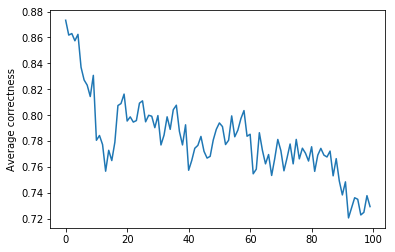

In [14]:
fig, ax = plt.subplots()
x = [x for x in range(100)]
ax.set(ylabel='Average correctness')
ax.plot(x, averages)

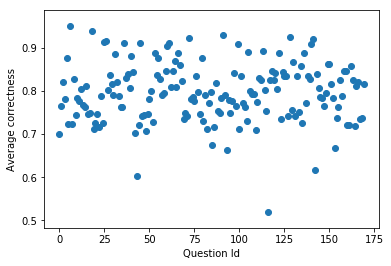

In [15]:
averages = grouped['averages']
y = [x for x in range(len(averages))]
fig, ax = plt.subplots()
ax.set(ylabel='Average correctness', xlabel='Question Id')
ax.scatter(y, averages)


In [16]:
print(features.count())
print(filtered.count())

id                10087305
user              10087305
place_asked       10087305
place_answered     9805599
type              10087305
inserted          10087305
response_time     10087305
place_map          9590318
language          10087305
options           10087305
ip_country         9306134
ip_id              9313760
correct           10087305
dtype: int64
id                4580490
user              4580490
place_asked       4580490
place_answered    4480661
type              4580490
inserted          4580490
response_time     4580490
place_map         4182678
language          4580490
options           4580490
ip_country        4027078
ip_id             4031549
correct           4580490
dtype: int64


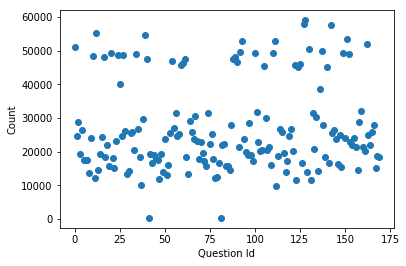

In [17]:
count_x = counted['count']
count_x.describe()
y = [x for x in range(len(count_x))]
fig, ax = plt.subplots()
ax.set(ylabel='Count', xlabel='Question Id')
ax.scatter(y, count_x)

In [20]:
filtered['correct'].mean()
filtered.count()

id                4580490
user              4580490
place_asked       4580490
place_answered    4480661
type              4580490
inserted          4580490
response_time     4580490
place_map         4182678
language          4580490
options           4580490
ip_country        4027078
ip_id             4031549
correct           4580490
dtype: int64